Nama : Mahesa Tirta Panjalu </br>
Kode : PYTN-KS18-012

# Import Library

In [75]:
import numpy as np
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

warnings.filterwarnings("ignore")

pd.set_option("display.max.columns", None)

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split Dataset and Standarize the Datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Evaluate  Models
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Read Dataset

In [22]:
# Membaca Dataset
bank_add_full = pd.read_csv('./../Dataset/bank_marketing/bank-additional-full.csv', sep=';', quoting=2)
bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bank_add = pd.read_csv('./../Dataset/bank_marketing/bank-additional.csv', sep=';', quoting=2)
bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39.0,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25.0,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38.0,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47.0,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
bank_full = pd.read_csv('../Dataset/bank_marketing/bank-full.csv', sep=';', quoting=2)
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [5]:
bank = pd.read_csv('../Dataset/bank_marketing/bank.csv', sep=';', quoting=2)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220.0,1.0,339.0,4.0,failure,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,330.0,1.0,failure,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3.0,jun,199.0,4.0,-1.0,0.0,unknown,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,may,226.0,1.0,-1.0,0.0,unknown,no


# Data Cleaning

## Cleaning Data bank_add_full

In [13]:
bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
bank_add_full.shape

(41188, 21)

In [17]:
bank_add_full.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [19]:
bank_add_full.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [26]:
print(bank_add_full['job'].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


In [22]:
len(bank_add_full[bank_add_full['default']=='unknown'])

8597

In [28]:
for column in bank_add_full.columns:
    unknown_count = bank_add_full[bank_add_full[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 330
Jumlah nilai 'unknown' pada kolom marital: 80
Jumlah nilai 'unknown' pada kolom education: 1731
Jumlah nilai 'unknown' pada kolom default: 8597
Jumlah nilai 'unknown' pada kolom housing: 990
Jumlah nilai 'unknown' pada kolom loan: 990
Jumlah nilai 'unknown' pada kolom contact: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom day_of_week: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 0
Jumlah nilai 'unknown' pada kolom emp.var.rate: 0
Jumlah nilai 'unknown' pada kolom cons.price.idx: 0
Jumlah nilai 'unknown' pada kolom cons.conf.idx: 0
Jumlah nilai 'unknown' pada kolom euribor3m: 0
Jumlah nilai 'unknown' pada kolom nr.employed: 0
Jumlah nilai 'unknown' pada kolom y: 0


**NOTE:** Pada dataset bank_add_full data kosong di beri dengan value unknown

## Cleaning Data bank_add

In [30]:
bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39.0,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25.0,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38.0,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47.0,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [38]:
bank_add.shape

(4119, 21)

In [32]:
bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   float64
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   float64
 11  campaign        4119 non-null   float64
 12  pdays           4119 non-null   float64
 13  previous        4119 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [31]:
bank_add.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [33]:
bank_add.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [35]:
for column in bank_add.columns:
    unknown_count = bank_add[bank_add[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 39
Jumlah nilai 'unknown' pada kolom marital: 11
Jumlah nilai 'unknown' pada kolom education: 167
Jumlah nilai 'unknown' pada kolom default: 803
Jumlah nilai 'unknown' pada kolom housing: 105
Jumlah nilai 'unknown' pada kolom loan: 105
Jumlah nilai 'unknown' pada kolom contact: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom day_of_week: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 0
Jumlah nilai 'unknown' pada kolom emp.var.rate: 0
Jumlah nilai 'unknown' pada kolom cons.price.idx: 0
Jumlah nilai 'unknown' pada kolom cons.conf.idx: 0
Jumlah nilai 'unknown' pada kolom euribor3m: 0
Jumlah nilai 'unknown' pada kolom nr.employed: 0
Jumlah nilai 'unknown' pada kolom y: 0


**NOTE:** Pada dataset bank_add data kosong di beri dengan value unknown

## Cleaning Data bank_full

In [37]:
bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [39]:
bank_full.shape

(45211, 17)

In [40]:
bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  float64
 1   job        45211 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45211 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  float64
 10  month      45211 non-null  object 
 11  duration   45211 non-null  float64
 12  campaign   45211 non-null  float64
 13  pdays      45211 non-null  float64
 14  previous   45211 non-null  float64
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(7), object(10)
memory usage: 5.9+ MB


In [41]:
bank_full.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [44]:
bank_full.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [45]:
for column in bank_full.columns:
    unknown_count = bank_full[bank_full[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 288
Jumlah nilai 'unknown' pada kolom marital: 0
Jumlah nilai 'unknown' pada kolom education: 1857
Jumlah nilai 'unknown' pada kolom default: 0
Jumlah nilai 'unknown' pada kolom balance: 0
Jumlah nilai 'unknown' pada kolom housing: 0
Jumlah nilai 'unknown' pada kolom loan: 0
Jumlah nilai 'unknown' pada kolom contact: 13020
Jumlah nilai 'unknown' pada kolom day: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 36959
Jumlah nilai 'unknown' pada kolom y: 0


**NOTE:** Pada dataset bank_full data kosong di beri dengan value unknown

## Cleaning data bank

In [46]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30.0,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220.0,1.0,339.0,4.0,failure,no
2,35.0,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,330.0,1.0,failure,no
3,30.0,management,married,tertiary,no,1476.0,yes,yes,unknown,3.0,jun,199.0,4.0,-1.0,0.0,unknown,no
4,59.0,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,may,226.0,1.0,-1.0,0.0,unknown,no


In [47]:
bank.shape

(4521, 17)

In [48]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   float64
 10  month      4521 non-null   object 
 11  duration   4521 non-null   float64
 12  campaign   4521 non-null   float64
 13  pdays      4521 non-null   float64
 14  previous   4521 non-null   float64
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(7), object(10)
memory usage: 600.6+ KB


In [49]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [50]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [52]:
for column in bank.columns:
    unknown_count = bank[bank[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 38
Jumlah nilai 'unknown' pada kolom marital: 0
Jumlah nilai 'unknown' pada kolom education: 187
Jumlah nilai 'unknown' pada kolom default: 0
Jumlah nilai 'unknown' pada kolom balance: 0
Jumlah nilai 'unknown' pada kolom housing: 0
Jumlah nilai 'unknown' pada kolom loan: 0
Jumlah nilai 'unknown' pada kolom contact: 1324
Jumlah nilai 'unknown' pada kolom day: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 3705
Jumlah nilai 'unknown' pada kolom y: 0


**NOTE:** Pada dataset bank data kosong di beri dengan value unknown

# Preprocessing Data

## Data bank_add_full dan bank_add
### bank_add_full

In [7]:
bank_add_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
bank_add_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
for column in bank_add_full.columns:
    unknown_count = bank_add_full[bank_add_full[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 330
Jumlah nilai 'unknown' pada kolom marital: 80
Jumlah nilai 'unknown' pada kolom education: 1731
Jumlah nilai 'unknown' pada kolom default: 8597
Jumlah nilai 'unknown' pada kolom housing: 990
Jumlah nilai 'unknown' pada kolom loan: 990
Jumlah nilai 'unknown' pada kolom contact: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom day_of_week: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 0
Jumlah nilai 'unknown' pada kolom emp.var.rate: 0
Jumlah nilai 'unknown' pada kolom cons.price.idx: 0
Jumlah nilai 'unknown' pada kolom cons.conf.idx: 0
Jumlah nilai 'unknown' pada kolom euribor3m: 0
Jumlah nilai 'unknown' pada kolom nr.employed: 0
Jumlah nilai 'unknown' pada kolom y: 0


In [11]:
# Membuat fungsi untuk mengisi nilai unknown menjadi modus pada kolom
def input_unknown(df):
    for column in df.columns:
        unknown_count = df[df[column] == 'unknown'][column].count()
        if unknown_count > 0:
            most_common_value = df[column].mode()[0]
            df.loc[df[column] == 'unknown', column] = most_common_value
            
    return df

In [23]:
bank_add_full_clear = input_unknown(bank_add_full)
bank_add_full_clear.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,no,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
for column in bank_add_full_clear.columns:
    unknown_count = bank_add_full_clear[bank_add_full_clear[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 0
Jumlah nilai 'unknown' pada kolom marital: 0
Jumlah nilai 'unknown' pada kolom education: 0
Jumlah nilai 'unknown' pada kolom default: 0
Jumlah nilai 'unknown' pada kolom housing: 0
Jumlah nilai 'unknown' pada kolom loan: 0
Jumlah nilai 'unknown' pada kolom contact: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom day_of_week: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 0
Jumlah nilai 'unknown' pada kolom emp.var.rate: 0
Jumlah nilai 'unknown' pada kolom cons.price.idx: 0
Jumlah nilai 'unknown' pada kolom cons.conf.idx: 0
Jumlah nilai 'unknown' pada kolom euribor3m: 0
Jumlah nilai 'unknown' pada kolom nr.employed: 0
Jumlah nilai 'unknown' pada kolom y: 0


In [19]:
print(bank_add_full_clear['y'].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


In [28]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

label_encoder = LabelEncoder()
for col in categorical_columns:
    bank_add_full_clear[col] = label_encoder.fit_transform(bank_add_full_clear[col])
    
bank_add_full_clear.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,0,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,0,1,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,0,1,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [29]:
bank_add_full_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  float64
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  float64
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  float64
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [30]:
X = bank_add_full_clear.drop(columns='y')
y = bank_add_full_clear['y']

In [31]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,3,1,0,0,0,0,1,6,1,261.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
1,57.0,7,1,3,0,0,0,1,6,1,149.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
2,37.0,7,1,3,0,1,0,1,6,1,226.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
3,40.0,0,1,1,0,0,0,1,6,1,151.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
4,56.0,7,1,3,0,0,1,1,6,1,307.0,1.0,999.0,0.0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,5,1,5,0,1,0,0,7,0,334.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,1,1,5,0,0,0,0,7,0,383.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,5,1,6,0,1,0,0,7,0,189.0,2.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44.0,9,1,5,0,0,0,0,7,0,442.0,1.0,999.0,0.0,1,-1.1,94.767,-50.8,1.028,4963.6


In [32]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)

In [34]:
X_train

array([[ 1.53303429, -0.17929992, -0.27980323, ...,  0.88644656,
         0.71245988,  0.33167991],
       [ 1.62899323,  0.94757962, -0.27980323, ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.29018564,  0.94757962, -0.27980323, ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [ 1.53303429,  0.38413985, -0.27980323, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 0.38152696,  1.5110194 , -0.27980323, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [ 3.26029527,  0.38413985, -0.27980323, ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

### bank_add

In [37]:
bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39.0,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25.0,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38.0,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47.0,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [38]:
bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   float64
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   float64
 11  campaign        4119 non-null   float64
 12  pdays           4119 non-null   float64
 13  previous        4119 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [39]:
for column in bank_add.columns:
    unknown_count = bank_add[bank_add[column] == 'unknown'][column].count()
    print(f"Jumlah nilai 'unknown' pada kolom {column}: {unknown_count}")

Jumlah nilai 'unknown' pada kolom age: 0
Jumlah nilai 'unknown' pada kolom job: 39
Jumlah nilai 'unknown' pada kolom marital: 11
Jumlah nilai 'unknown' pada kolom education: 167
Jumlah nilai 'unknown' pada kolom default: 803
Jumlah nilai 'unknown' pada kolom housing: 105
Jumlah nilai 'unknown' pada kolom loan: 105
Jumlah nilai 'unknown' pada kolom contact: 0
Jumlah nilai 'unknown' pada kolom month: 0
Jumlah nilai 'unknown' pada kolom day_of_week: 0
Jumlah nilai 'unknown' pada kolom duration: 0
Jumlah nilai 'unknown' pada kolom campaign: 0
Jumlah nilai 'unknown' pada kolom pdays: 0
Jumlah nilai 'unknown' pada kolom previous: 0
Jumlah nilai 'unknown' pada kolom poutcome: 0
Jumlah nilai 'unknown' pada kolom emp.var.rate: 0
Jumlah nilai 'unknown' pada kolom cons.price.idx: 0
Jumlah nilai 'unknown' pada kolom cons.conf.idx: 0
Jumlah nilai 'unknown' pada kolom euribor3m: 0
Jumlah nilai 'unknown' pada kolom nr.employed: 0
Jumlah nilai 'unknown' pada kolom y: 0


In [40]:
bank_add_clear = input_unknown(bank_add)
bank_add_clear.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39.0,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25.0,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38.0,services,married,basic.9y,no,yes,no,telephone,jun,fri,17.0,3.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47.0,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [44]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

label_encoder = LabelEncoder()
for col in categorical_columns:
    bank_add_clear[col] = label_encoder.fit_transform(bank_add_clear[col])
    
bank_add_clear.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30.0,1,1,2,0,1,0,0,6,0,487.0,2.0,999.0,0.0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39.0,7,2,3,0,0,0,1,6,0,346.0,4.0,999.0,0.0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25.0,7,1,3,0,1,0,1,4,4,227.0,1.0,999.0,0.0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38.0,7,1,2,0,1,0,1,4,0,17.0,3.0,999.0,0.0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47.0,0,1,6,0,1,0,0,7,1,58.0,1.0,999.0,0.0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [74]:
print(bank_add_clear['y'].value_counts())

0    3668
1     451
Name: y, dtype: int64


In [45]:
X_test = bank_add_clear.drop(columns='y')
y_test = bank_add_clear['y']

# Pembuatan Model Machine Learning

## Logistic Regression

In [118]:
model_logis = LogisticRegression(solver='liblinear', C=0.001, random_state=42, max_iter=100)
model_logis.fit(X_train,y)

LogisticRegression(C=0.001, random_state=42, solver='liblinear')

In [119]:
y_logis_pred = model_logis.predict(X_test)

In [120]:
print("Akurasi: ", accuracy_score(y_test, y_logis_pred))
print(classification_report(y_test, y_logis_pred))

Akurasi:  0.8907501820830298
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3668
           1       0.67      0.00      0.01       451

    accuracy                           0.89      4119
   macro avg       0.78      0.50      0.48      4119
weighted avg       0.87      0.89      0.84      4119



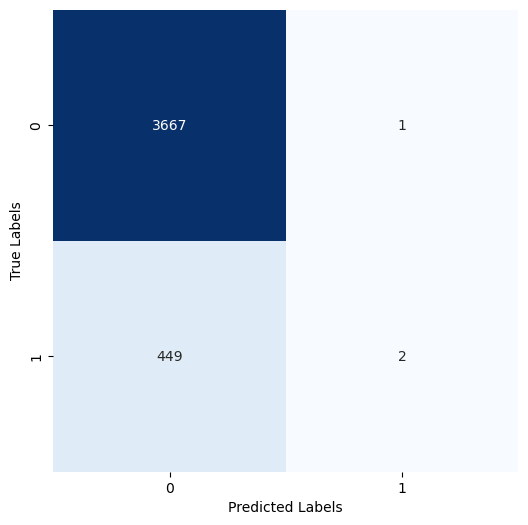

In [121]:
# Buat matriks konfusi
cm = confusion_matrix(y_test, y_logis_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## K-Nearest Neighbor (KNN)

In [77]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y)

KNeighborsClassifier(n_neighbors=3)

In [80]:
X_test_scl = scaler.fit_transform(X_test)
y_knn_pred = model_knn.predict(X_test_scl)

In [81]:
print("Akurasi: ", accuracy_score(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

Akurasi:  0.9410050983248361
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3668
           1       0.78      0.64      0.70       451

    accuracy                           0.94      4119
   macro avg       0.87      0.81      0.84      4119
weighted avg       0.94      0.94      0.94      4119



In [85]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train, y)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

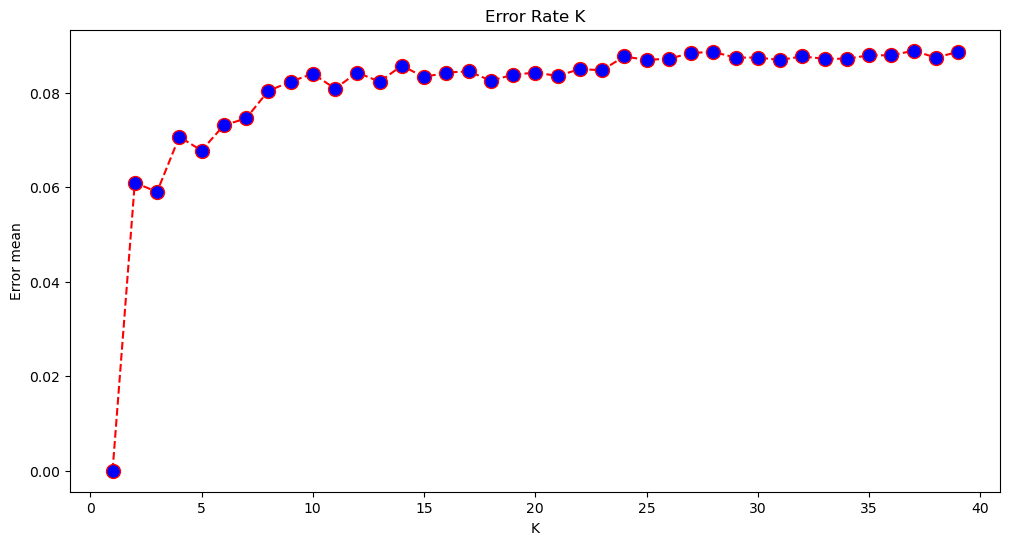

In [106]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')  
plt.xlabel('K')  
plt.ylabel('Error mean')

In [107]:
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(X_train, y)

KNeighborsClassifier(n_neighbors=1)

In [108]:
X_test_scl = scaler.fit_transform(X_test)
y_knn_pred = model_knn.predict(X_test_scl)

In [109]:
print("Akurasi: ", accuracy_score(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

Akurasi:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3668
           1       1.00      1.00      1.00       451

    accuracy                           1.00      4119
   macro avg       1.00      1.00      1.00      4119
weighted avg       1.00      1.00      1.00      4119



## Support Vector Machine

In [137]:
model_svm = SVC(kernel='rbf', C=100, random_state=42, gamma=0.1)
model_svm.fit(X_train, y)

SVC(C=100, gamma=0.1, random_state=42)

In [138]:
y_svm_pred = model_svm.predict(X_test)

In [139]:
print("Akurasi: ", accuracy_score(y_test, y_svm_pred))
print(classification_report(y_test, y_svm_pred))

Akurasi:  0.890507404709881
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      3668
           1       0.00      0.00      0.00       451

    accuracy                           0.89      4119
   macro avg       0.45      0.50      0.47      4119
weighted avg       0.79      0.89      0.84      4119

